In [57]:
import pandas as pd

In [58]:
#read the dataset
location=r"C:\Users\Arjun\Downloads\breastcancer-rf.csv"

In [59]:
names = ['id_number', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst'] 

dx = ['Benign', 'Malignant']

In [60]:
# load the training data from breast cancer data set
df_training = pd.read_csv(location, names=names)

In [61]:
# examine the structure of data
df_training.head()

,id_number,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
df_training.set_index(['id_number'],inplace=True)

In [63]:
df_training['diagnosis']=df_training['diagnosis'].map({'M':1,'B':0})

In [64]:
names_index=names[2:]
names_index

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [65]:
df_training.shape

(569, 31)

In [66]:
print(df_training.diagnosis.unique())
print(df_training.diagnosis.value_counts())

[1 0]
0    357
1    212
Name: diagnosis, dtype: int64


In [67]:
print(df_training.diagnosis.value_counts(normalize=True))

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64


In [68]:
df_training.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [69]:
X_df=df_training[names_index]
y_df=df_training['diagnosis']

In [70]:
print(type(X_df))
print(type(y_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test= train_test_split(X_df,y_df,test_size=0.20,random_state=42)

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
clf=RandomForestClassifier(random_state=42)

In [75]:
X_train=X_train.values
y_train=y_train.values

In [76]:
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [77]:
importance=list(clf.feature_importances_)
importance

[0.048703371737755234,
 0.013590877656998469,
 0.053269746128179675,
 0.04755500886018552,
 0.007285327830663239,
 0.013944325074050485,
 0.06800084191430111,
 0.10620998844591638,
 0.003770291819290666,
 0.0038857721093275,
 0.02013891719419153,
 0.004723988073894702,
 0.01130301388178435,
 0.022406960160458473,
 0.004270910110504497,
 0.005253215538990106,
 0.009385832251596627,
 0.003513255105598506,
 0.004018418617722808,
 0.00532145634222884,
 0.07798687515738047,
 0.021749011006763207,
 0.06711483267839194,
 0.15389236463205394,
 0.010644205147280952,
 0.020266035899623565,
 0.031801595740040434,
 0.14466326620735528,
 0.010120176131974357,
 0.005210118545497296]

In [78]:
feature_importance=[(feature,round(importance,2))for feature,
                    importance in zip(names_index,importance)]
feature_importance

[('radius_mean', 0.05),
 ('texture_mean', 0.01),
 ('perimeter_mean', 0.05),
 ('area_mean', 0.05),
 ('smoothness_mean', 0.01),
 ('compactness_mean', 0.01),
 ('concavity_mean', 0.07),
 ('concave_points_mean', 0.11),
 ('symmetry_mean', 0.0),
 ('fractal_dimension_mean', 0.0),
 ('radius_se', 0.02),
 ('texture_se', 0.0),
 ('perimeter_se', 0.01),
 ('area_se', 0.02),
 ('smoothness_se', 0.0),
 ('compactness_se', 0.01),
 ('concavity_se', 0.01),
 ('concave_points_se', 0.0),
 ('symmetry_se', 0.0),
 ('fractal_dimension_se', 0.01),
 ('radius_worst', 0.08),
 ('texture_worst', 0.02),
 ('perimeter_worst', 0.07),
 ('area_worst', 0.15),
 ('smoothness_worst', 0.01),
 ('compactness_worst', 0.02),
 ('concavity_worst', 0.03),
 ('concave_points_worst', 0.14),
 ('symmetry_worst', 0.01),
 ('fractal_dimension_worst', 0.01)]

In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
feature_importance

[('radius_mean', 0.05),
 ('texture_mean', 0.01),
 ('perimeter_mean', 0.05),
 ('area_mean', 0.05),
 ('smoothness_mean', 0.01),
 ('compactness_mean', 0.01),
 ('concavity_mean', 0.07),
 ('concave_points_mean', 0.11),
 ('symmetry_mean', 0.0),
 ('fractal_dimension_mean', 0.0),
 ('radius_se', 0.02),
 ('texture_se', 0.0),
 ('perimeter_se', 0.01),
 ('area_se', 0.02),
 ('smoothness_se', 0.0),
 ('compactness_se', 0.01),
 ('concavity_se', 0.01),
 ('concave_points_se', 0.0),
 ('symmetry_se', 0.0),
 ('fractal_dimension_se', 0.01),
 ('radius_worst', 0.08),
 ('texture_worst', 0.02),
 ('perimeter_worst', 0.07),
 ('area_worst', 0.15),
 ('smoothness_worst', 0.01),
 ('compactness_worst', 0.02),
 ('concavity_worst', 0.03),
 ('concave_points_worst', 0.14),
 ('symmetry_worst', 0.01),
 ('fractal_dimension_worst', 0.01)]

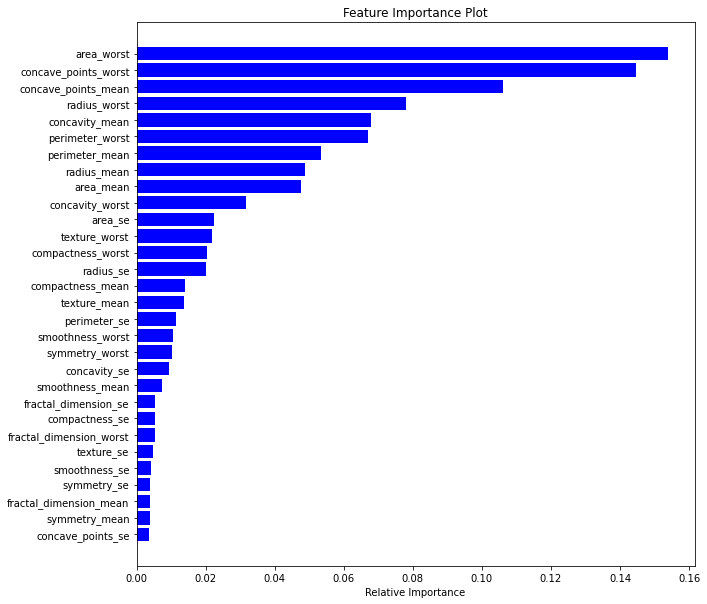

In [81]:
features = names_index
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importance Plot')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## OOB

In [82]:
RANDOM_STATE = 42 

In [83]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
      RandomForestClassifier(  n_estimators=100,
                               warm_start=True, 
                               oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)
    ),
    ("RandomForestClassifier, max_features='log2'",
      RandomForestClassifier(  n_estimators=100,
                               warm_start=True, 
                               max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)
    ),
    ("RandomForestClassifier, max_features=None",
      RandomForestClassifier(  n_estimators=100,
                               warm_start=True, 
                               max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE)
    )
]

In [84]:
# just checkin ...
for label, clf in ensemble_clfs:
    print(label, '\n', clf)

RandomForestClassifier, max_features='sqrt' 
 RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=42,
                       warm_start=True)
RandomForestClassifier, max_features='log2' 
 RandomForestClassifier(max_features='log2', oob_score=True, random_state=42,
                       warm_start=True)
RandomForestClassifier, max_features=None 
 RandomForestClassifier(max_features=None, oob_score=True, random_state=42,
                       warm_start=True)


In [85]:
from collections import OrderedDict

In [86]:
# just checkin ...
OrderedDict((label, []) for label, _ in ensemble_clfs)

OrderedDict([("RandomForestClassifier, max_features='sqrt'", []),
             ("RandomForestClassifier, max_features='log2'", []),
             ('RandomForestClassifier, max_features=None', [])])

In [87]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
error_rate

OrderedDict([("RandomForestClassifier, max_features='sqrt'", []),
             ("RandomForestClassifier, max_features='log2'", []),
             ('RandomForestClassifier, max_features=None', [])])

In [88]:
# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

In [89]:
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

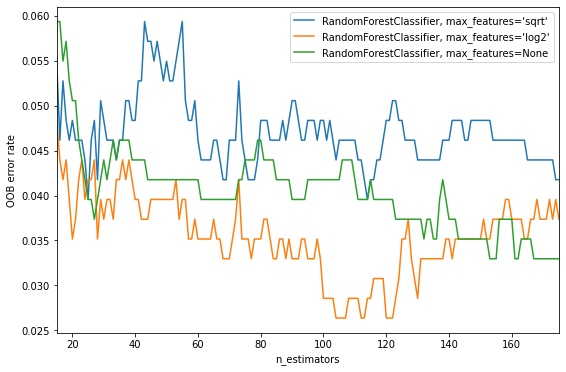

In [90]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize=(9,6))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

### Random forest classifier with max feature='sqrt' gives more OOB error rate than others.
### Random forest classifier with max feature='log2' gives less OOB error rate than others.  
### Random forest classifier with max feature='None' gives moderate OOB error rate than other two.  